In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargo el dataframe
df = pd.read_csv("data/hospital_train.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [4]:
# Reemplazo los nombres de las columnas
column_names = pd.read_csv("data/columns_meaning.csv", index_col = 0)
column_names_dict = column_names.to_dict()

In [16]:
column_names_dict

{'Description': {0: 'Case_ID registered in Hospital',
  1: 'Unique code for the Hospital',
  2: 'Unique code for the type of Hospital',
  3: 'City Code of the Hospital',
  4: 'Region Code of the Hospital',
  5: 'Number of Extra rooms available in the Hospital',
  6: 'Department overlooking the case',
  7: 'Code for the Ward type',
  8: 'Code for the Ward Facility',
  9: 'Condition of Bed in the Ward',
  10: 'Unique Patient Id',
  11: 'City Code for the patient',
  12: 'Admission Type registered by the Hospital',
  13: 'Severity of the illness recorded at the time of admission',
  14: 'Number of Visitors with the patient',
  15: 'Age of the patient',
  16: 'Deposit at the Admission Time',
  17: 'Stay Days by the patient'}}

In [5]:
df.columns = column_names_dict["Description"].values()
df.head()

,Case_ID registered in Hospital,Unique code for the Hospital,Unique code for the type of Hospital,City Code of the Hospital,Region Code of the Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Deposit at the Admission Time,Stay Days by the patient
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [22]:
# Empiezo a explorar los datos
df.shape

(100000, 18)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Case_ID registered in Hospital                             100000 non-null  int64  
 1   Unique code for the Hospital                               100000 non-null  int64  
 2   Unique code for the type of Hospital                       100000 non-null  object 
 3   City Code of the Hospital                                  100000 non-null  int64  
 4   Region Code of the Hospital                                100000 non-null  object 
 5   Number of Extra rooms available in the Hospital            100000 non-null  int64  
 6   Department overlooking the case                            100000 non-null  object 
 7   Code for the Ward type                                     100000 non-null  object 


# Categorical variables

In [ ]:
# Voy a empezar revisando el significado de las variables categóricas, para ver si son nominales u ordinales

In [45]:
# Por lo que he visto, el tipo de hospital hace referencia a si es para mujeres, niños, cardíaco, oncológico, etc... 
# Es decir, lo puedo pasar por un pd.get_dummies() ya que en principio es una variable nominal. El orden no influye
print("Unique code for the type of Hospital:", df.iloc[:, 2].unique())

#######################################################

# Esto tiene pinta de ser similar, aunque a lo mejor la ciudad es irrelevante. Veremos más adelante con el análisis
print("City Code of the Hospital:", df.iloc[:, 3].unique())

#######################################################

# Esta variable puede ser redundante con la anterior
# A esta le tocaría también un pd.get_dummies()
print("Region Code of the Hospital:", df.iloc[:, 4].unique())

#######################################################

# Nominal --> pd.get_dummies()
print("Department overlooking the case:", df.iloc[:, 6].unique())

#######################################################

# Hace referencia a: Cardiology, Dialysis, Endocrinology, etc...
# Nominal --> pd.get_dummies()
print("Code for the Ward type:", df.iloc[:, 7].unique())

#######################################################

# Esta en principio parece irrelevante
# Nominal --> pd.get_dummies()
print("Code for the Ward Facility:", df.iloc[:, 8].unique())

#######################################################

# Cardinal --> dict encoding + map
print("Admission Type registered by the Hospital:", df.iloc[:, 12].unique())

#######################################################

# Cardinal --> dict encoding + map
print("Severity of the illness recorded at the time of admission:", df.iloc[:, 13].unique())

#######################################################

# Cardinal --> dict encoding + map
print("Age of the patient:", df.iloc[:, 15].unique())

#######################################################

# Cardinal --> dict encoding + map
print("Stay Days by the patient:", df.iloc[:, 17].unique())

Unique code for the type of Hospital: ['a' 'c' 'f' 'b' 'd' 'e' 'g']
City Code of the Hospital: [ 6  5  9  1  7  2  3  4 11 13 10]
Region Code of the Hospital: ['X' 'Z' 'Y']
Department overlooking the case: ['gynecology' 'anesthesia' 'radiotherapy' 'TB & Chest disease' 'surgery']
Code for the Ward type: ['R' 'Q' 'S' 'P' 'T' 'U']
Code for the Ward Facility: ['F' 'B' 'E' 'C' 'D' 'A']
Admission Type registered by the Hospital: ['Urgent' 'Trauma' 'Emergency']
Severity of the illness recorded at the time of admission: ['Moderate' 'Extreme' 'Minor']
Age of the patient: ['21-30' '51-60' '71-80' '11-20' '31-40' '0-10' '61-70' '41-50' '81-90'
 '91-100']
Stay Days by the patient: ['0-10' '21-30' '11-20' '51-60' '31-40' '71-80' 'More than 100 Days'
 '41-50' '81-90' '61-70' '91-100']


In [52]:
df.iloc[:, 2].value_counts()

a    44909
b    21927
c    14346
e     7828
d     6416
f     3280
g     1294
Name: Unique code for the type of Hospital, dtype: int64

In [63]:
cat_variables = [2, 3, 4, 6, 7, 8, 12, 13, 15, 17]

for column in cat_variables:
    print(df.iloc[:, column].name)
    print(df.iloc[:, column].value_counts())
    print("#" * 100)

Unique code for the type of Hospital
a    44909
b    21927
c    14346
e     7828
d     6416
f     3280
g     1294
Name: Unique code for the type of Hospital, dtype: int64
####################################################################################################
City Code of the Hospital
1     17259
2     16399
6     14793
7     11163
5      9832
3      9802
9      8097
11     5528
4      4356
10     1664
13     1107
Name: City Code of the Hospital, dtype: int64
####################################################################################################
Region Code of the Hospital
X    41936
Y    38430
Z    19634
Name: Region Code of the Hospital, dtype: int64
####################################################################################################
Department overlooking the case
gynecology            78333
anesthesia             9262
radiotherapy           8909
TB & Chest disease     3105
surgery                 391
Name: Department overlooking the case, dt

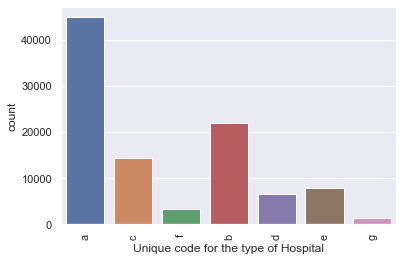

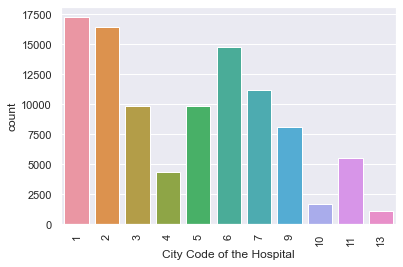

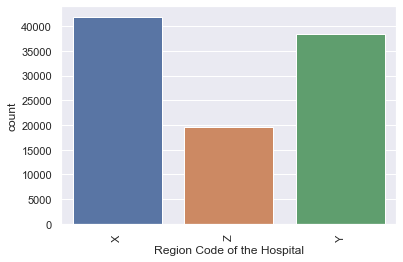

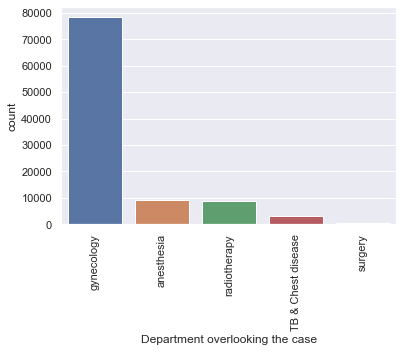

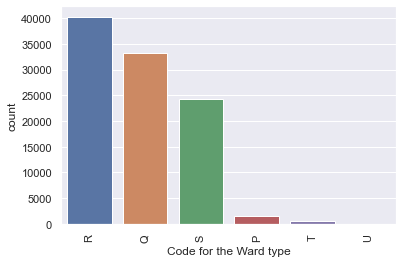

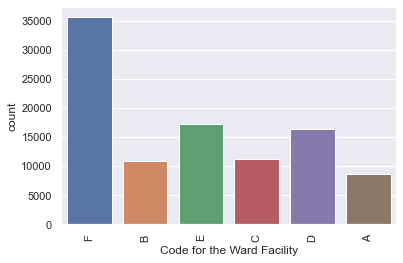

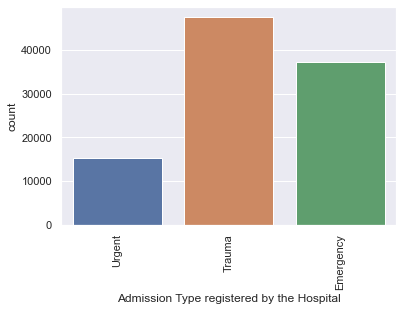

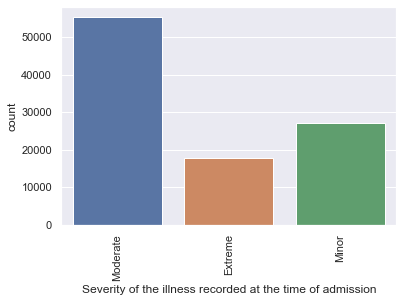

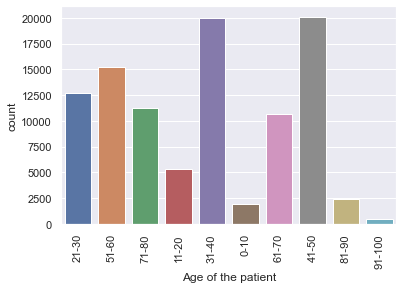

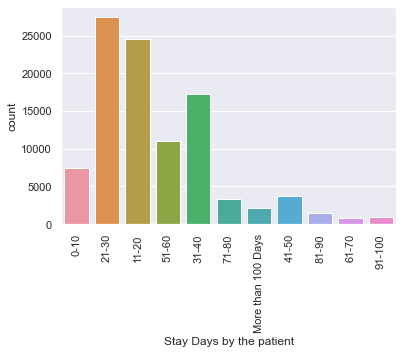

In [67]:
# Veamos cuantos casos tenemos de cada
sns.set_theme()

for column in cat_variables:
    sns.countplot(x = df.iloc[:, column], data = df)
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
# Hay un par de descompensaciones, pero las que más me "preocupan" son las que hay en la variable "target". Hay bastante variabilidad entre la cantidad de ocurrencias de los diferentes outcomes. ¿Podría sesgar las predicciones?

# Numerical variables

In [61]:
df.describe()

,Case_ID registered in Hospital,Unique code for the Hospital,City Code of the Hospital,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Number of Visitors with the patient,Deposit at the Admission Time
count,100000.000000,100000.000000,100000.000000,100000.000000,99967.000000,100000.000000,98517.000000,100000.000000,100000.000000
mean,159495.809150,18.328240,4.776580,3.197210,2.623696,65953.074310,7.226164,3.295470,4879.749330
std,91922.534735,8.626225,3.102853,1.170569,0.874427,37872.831751,4.717411,1.787288,1083.174869
min,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79969.750000,11.000000,2.000000,2.000000,2.000000,33219.000000,4.000000,2.000000,4187.000000
50%,159595.000000,19.000000,5.000000,3.000000,3.000000,65869.000000,8.000000,3.000000,4740.000000
75%,239362.250000,26.000000,7.000000,4.000000,3.000000,98616.000000,8.000000,4.000000,5410.000000
max,318437.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,10842.000000


In [62]:
# De esta tabla todo lo que son IDs, codes, etc... irrelevante
# De hecho, son categóricas que se les han asignado número

# Del resto, veo posibles outliers en:
#       -> Number of Extra rooms available in the Hospital
#       -> Number of Visitors with the patient	
#       -> Deposit at the Admission Time

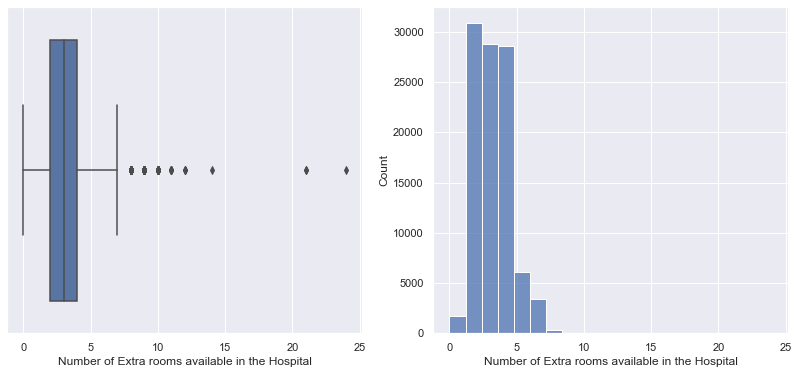

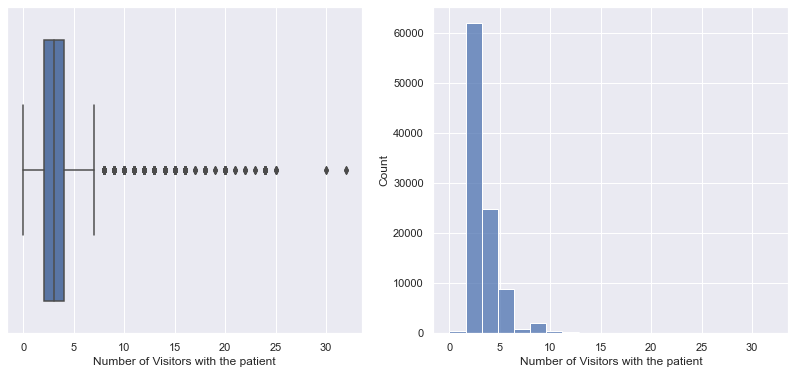

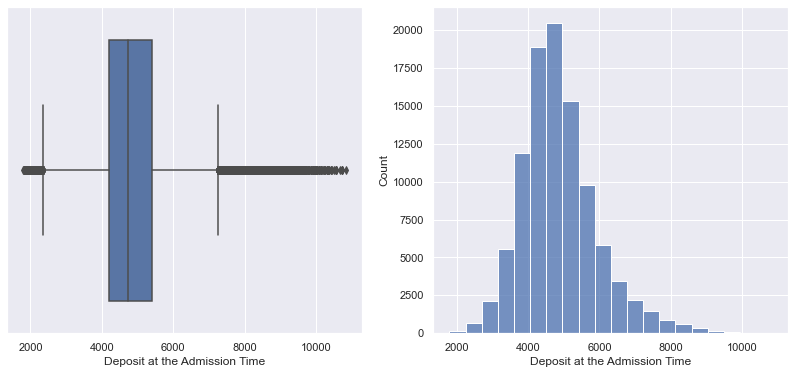

In [78]:
num_variables = ['Number of Extra rooms available in the Hospital', 'Number of Visitors with the patient', 'Deposit at the Admission Time']

for column in num_variables:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
    sns.boxplot(x = column, data = df, ax = ax1)
    sns.histplot(df[column], ax = ax2, bins = 20)
    plt.show()

In [ ]:
# Tenemos unos cuantos outliers

In [10]:
len(df)

100000

In [22]:
#df[df["Number of Extra rooms available in the Hospital"] > 7].shape
#df[df["Number of Visitors with the patient"] > 10].shape
#df[df["Deposit at the Admission Time"] > 10000].shape

(786, 18)

In [23]:
df2 = df[df["Number of Extra rooms available in the Hospital"] <= 7]
df2 = df2[df2["Number of Visitors with the patient"] <= 10]
df2 = df2[df2["Deposit at the Admission Time"] <= 10000]

df2.shape

(98757, 18)

# Correlaciones

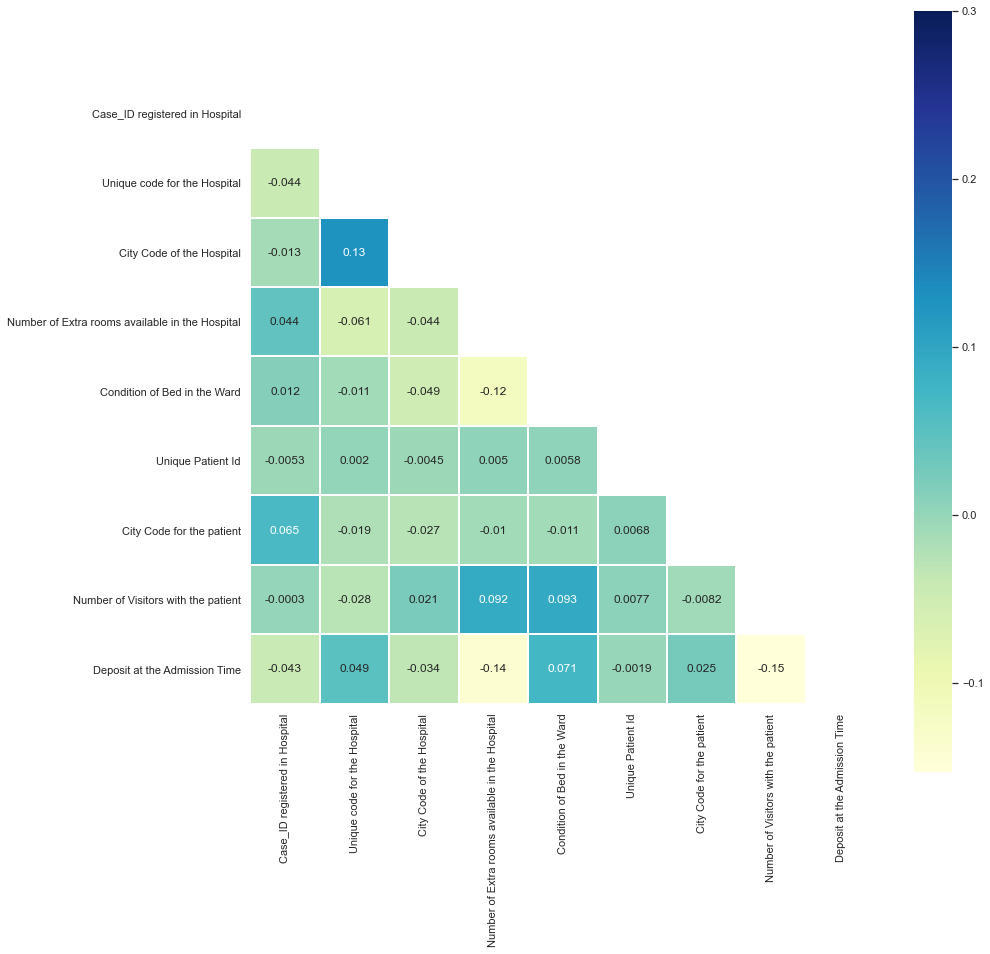

In [87]:
# Primero, sin ningún tipo de procesamiento

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 14))
    ax = sns.heatmap(corr, annot = True, linewidths = .1, mask=mask, vmax=.3, square=True, cmap = "YlGnBu")

In [7]:
# Paso las variables categóricas a númericas

# Voy a guardar los cambios en un nuevo dataframe para conservar el original
df2 = pd.get_dummies(df, prefix = ["hospital_type", "hospital_city", "hospital_region", "department", "ward_type", "ward_facility"], columns = ["Unique code for the type of Hospital", "City Code of the Hospital", "Region Code of the Hospital", "Department overlooking the case", "Code for the Ward type", "Code for the Ward Facility"])

df2.head()

,Case_ID registered in Hospital,Unique code for the Hospital,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,...,ward_type_R,ward_type_S,ward_type_T,ward_type_U,ward_facility_A,ward_facility_B,ward_facility_C,ward_facility_D,ward_facility_E,ward_facility_F
0,161528,6,2,4.0,45810,2.0,Urgent,Moderate,2,21-30,...,1,0,0,0,0,0,0,0,0,1
1,159472,23,4,2.0,128565,15.0,Trauma,Moderate,4,51-60,...,0,0,0,0,0,0,0,0,0,1
2,309765,2,2,3.0,46565,5.0,Urgent,Moderate,2,71-80,...,0,1,0,0,0,0,0,0,0,1
3,279614,32,3,4.0,124546,6.0,Emergency,Moderate,4,11-20,...,0,1,0,0,0,1,0,0,0,0
4,147791,14,3,2.0,22729,8.0,Urgent,Moderate,2,51-60,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
Admission Type registered by the Hospital: ['Urgent' 'Trauma' 'Emergency']

Severity of the illness recorded at the time of admission: ['Moderate' 'Extreme' 'Minor']

Age of the patient: ['21-30' '51-60' '71-80' '11-20' '31-40' '0-10' '61-70' '41-50' '81-90'
 '91-100']

Stay Days by the patient: ['0-10' '21-30' '11-20' '51-60' '31-40' '71-80' 'More than 100 Days'
 '41-50' '81-90' '61-70' '91-100']

In [8]:
# Ahora trabajamos sobre las variables ordinales

# Admission Type registered by the Hospital
dict_1 = {
    "Emergency" : 1,
    "Trauma" : 2,
    "Urgent" : 3
}

# Severity of the illness recorded at the time of admission
dict_2 = {
    "Minor" : 1,
    "Moderate" : 2,
    "Extreme" : 3
}

# Age of the patient
dict_3 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
}

# Stay Days by the patient
dict_4 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
    "More than 100 Days" : 11
}

df2["admission_type_enc"] = df2["Admission Type registered by the Hospital"].map(dict_1)
df2["illness_severity_enc"] = df2["Severity of the illness recorded at the time of admission"].map(dict_2)
df2["admission_type_enc"] = df2["Age of the patient"].map(dict_3)
df2["target_enc"] = df2["Stay Days by the patient"].map(dict_4)
df2.head()

,Case_ID registered in Hospital,Unique code for the Hospital,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,...,ward_type_U,ward_facility_A,ward_facility_B,ward_facility_C,ward_facility_D,ward_facility_E,ward_facility_F,admission_type_enc,illness_severity_enc,target_enc
0,161528,6,2,4.0,45810,2.0,Urgent,Moderate,2,21-30,...,0,0,0,0,0,0,1,3,2,1
1,159472,23,4,2.0,128565,15.0,Trauma,Moderate,4,51-60,...,0,0,0,0,0,0,1,6,2,3
2,309765,2,2,3.0,46565,5.0,Urgent,Moderate,2,71-80,...,0,0,0,0,0,0,1,8,2,2
3,279614,32,3,4.0,124546,6.0,Emergency,Moderate,4,11-20,...,0,0,1,0,0,0,0,2,2,6
4,147791,14,3,2.0,22729,8.0,Urgent,Moderate,2,51-60,...,0,0,0,0,0,1,0,6,2,6


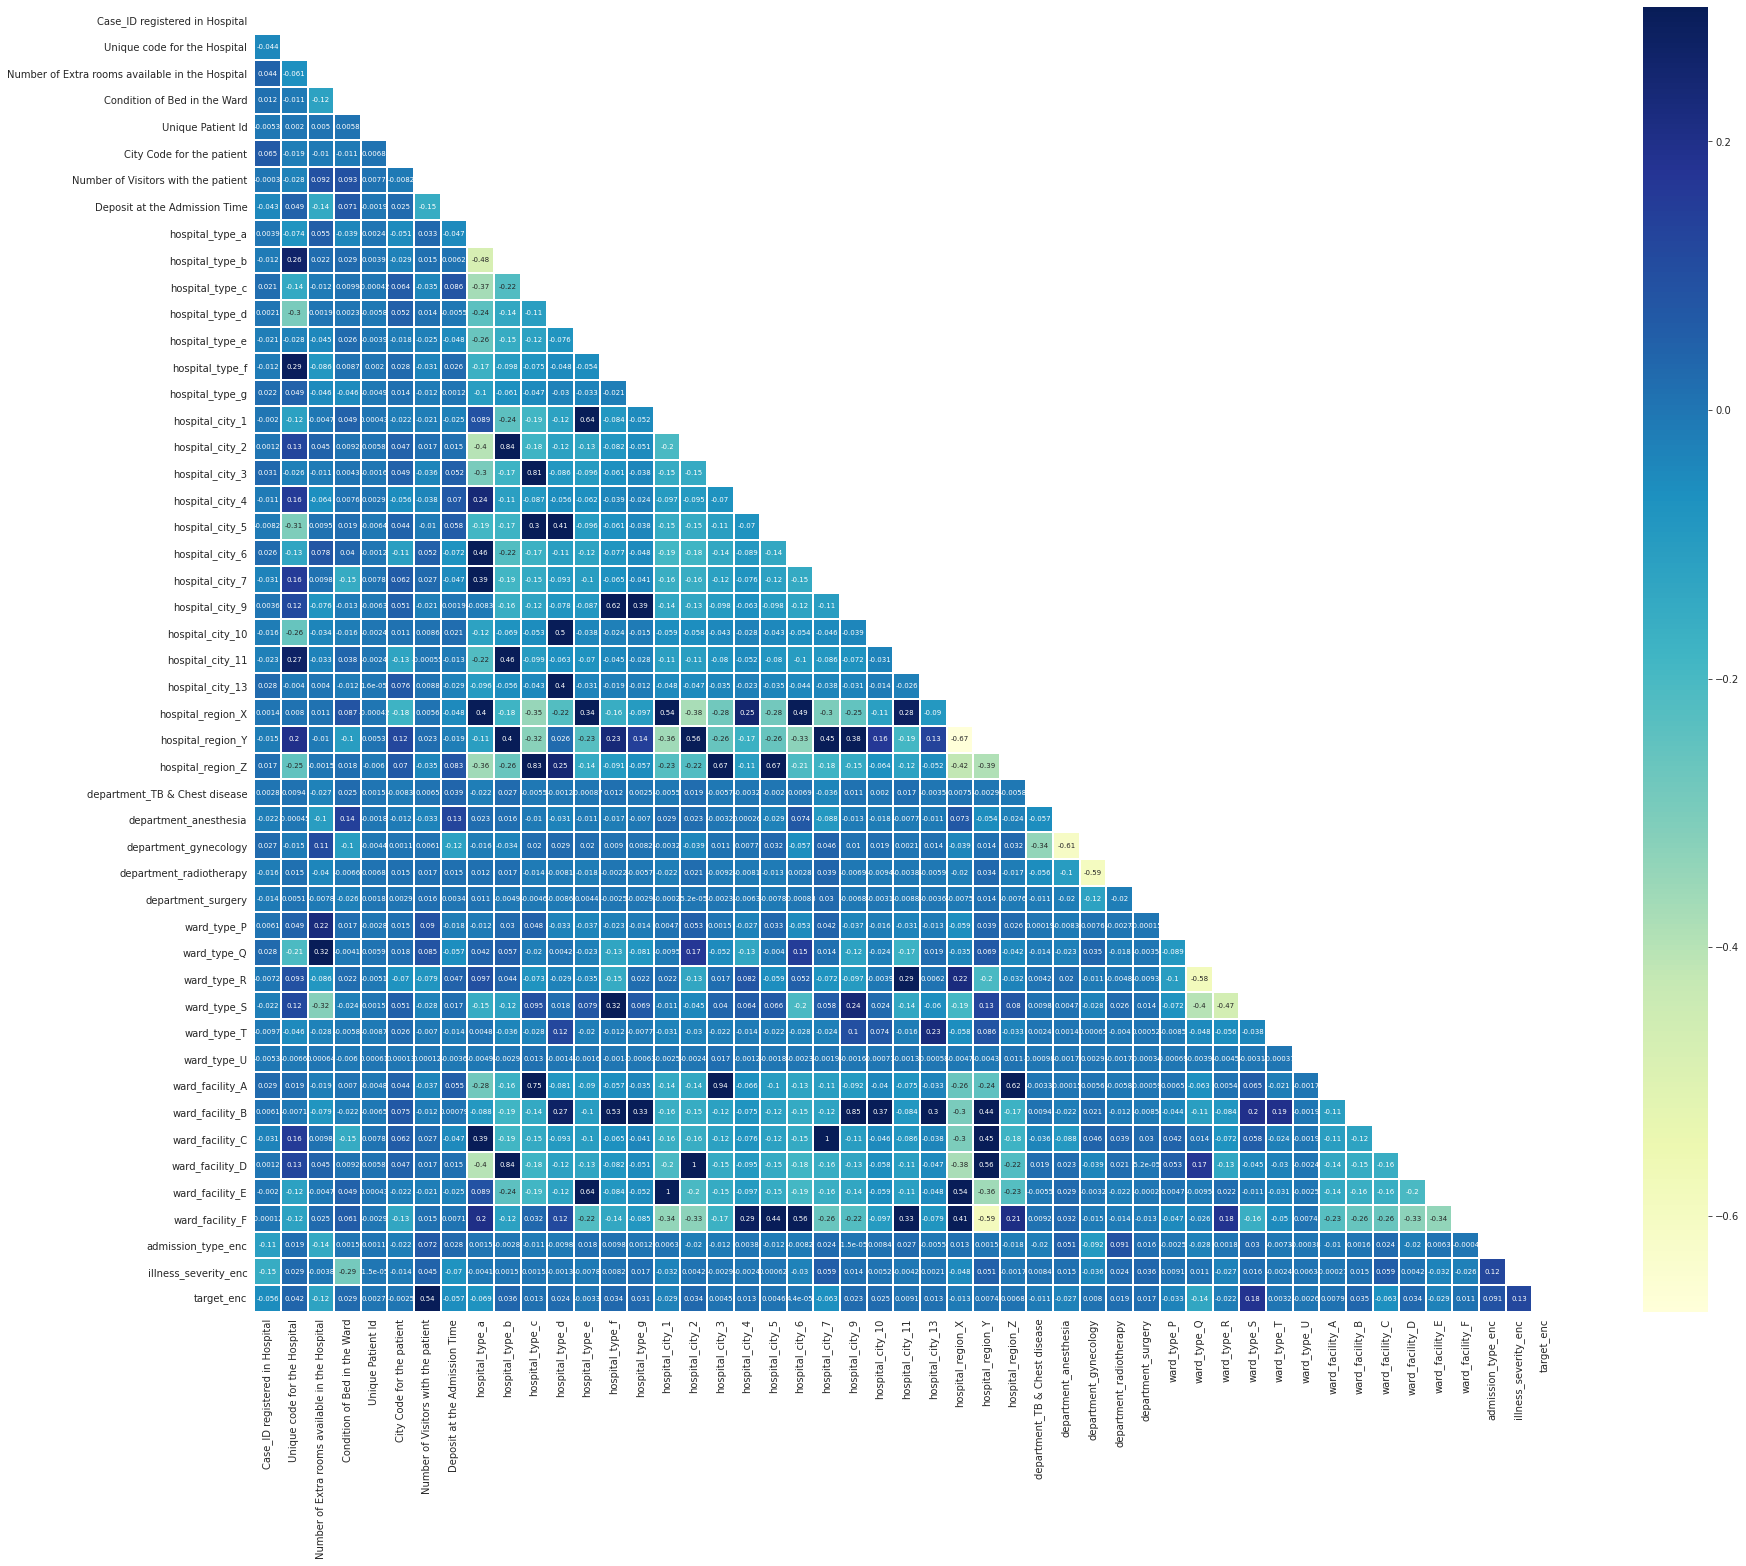

In [21]:
# Primero, sin ningún tipo de procesamiento

corr = df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 24))
    ax = sns.heatmap(corr, annot = True, annot_kws = {"fontsize" : "x-small"}, linewidths = .1, mask=mask, vmax=.3, square=True, cmap = "YlGnBu")

In [25]:
corr.loc["target_enc"].sort_values(ascending = False)

target_enc                                         1.000000
Number of Visitors with the patient                0.543491
ward_type_S                                        0.183120
illness_severity_enc                               0.125333
admission_type_enc                                 0.090520
Unique code for the Hospital                       0.041750
hospital_type_b                                    0.035720
ward_facility_B                                    0.034736
ward_facility_D                                    0.034281
hospital_city_2                                    0.034281
hospital_type_f                                    0.033919
hospital_type_g                                    0.031261
Condition of Bed in the Ward                       0.029388
hospital_city_10                                   0.024576
hospital_type_d                                    0.024264
hospital_city_9                                    0.023135
department_radiotherapy                 

In [ ]:
# Parece que las variables con más correlación con nuestro target son:
# - Number of Visitors with the patient
# - ward_type_s
# illness_severity_enc